In [2]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [5]:
import pandas as pd

ner = pd.read_csv('/content/drive/My Drive/Google colab data/ner.csv',  encoding = "ISO-8859-1", error_bad_lines=False) 
ner_dataset = pd.read_csv('/content/drive/My Drive/Google colab data/ner_dataset.csv',encoding= 'latin1')

b'Skipping line 281837: expected 25 fields, saw 34\n'


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
ner_dataset.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O


In [7]:
ner_dataset.columns

Index(['Sentence #', 'Word', 'POS', 'Tag'], dtype='object')

In [8]:
ner_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Sentence #  47959 non-null    object
 1   Word        1048575 non-null  object
 2   POS         1048575 non-null  object
 3   Tag         1048575 non-null  object
dtypes: object(4)
memory usage: 32.0+ MB


In [9]:
ner_dataset.describe()

,Sentence #,Word,POS,Tag
count,47959,1048575,1048575,1048575
unique,47959,35178,42,17
top,Sentence: 13824,the,NN,O
freq,1,52573,145807,887908


geo = Geographical Entity

org = Organization

per = Person

gpe = Geopolitical Entity

tim = Time indicator

art = Artifact

eve = Event

nat = Natural Phenomenon

In [10]:
ner_dataset.Tag.unique()

array(['O', 'B-geo', 'B-gpe', 'B-per', 'I-geo', 'B-org', 'I-org', 'B-tim',
       'B-art', 'I-art', 'I-per', 'I-gpe', 'I-tim', 'B-nat', 'B-eve',
       'I-eve', 'I-nat'], dtype=object)

In [11]:
ner_dataset.Tag.value_counts()

O        887908
B-geo     37644
B-tim     20333
B-org     20143
I-per     17251
B-per     16990
I-org     16784
B-gpe     15870
I-geo      7414
I-tim      6528
B-art       402
B-eve       308
I-art       297
I-eve       253
B-nat       201
I-gpe       198
I-nat        51
Name: Tag, dtype: int64

In [12]:
ner_dataset.POS.unique()

array(['NNS', 'IN', 'VBP', 'VBN', 'NNP', 'TO', 'VB', 'DT', 'NN', 'CC',
       'JJ', '.', 'VBD', 'WP', '``', 'CD', 'PRP', 'VBZ', 'POS', 'VBG',
       'RB', ',', 'WRB', 'PRP$', 'MD', 'WDT', 'JJR', ':', 'JJS', 'WP$',
       'RP', 'PDT', 'NNPS', 'EX', 'RBS', 'LRB', 'RRB', '$', 'RBR', ';',
       'UH', 'FW'], dtype=object)

In [13]:
number_of_word = len(list(set(ner_dataset.Word.values)))
number_of_word

35178

## Create training data / futher data preprocessing

In [14]:
ner_dataset = ner_dataset.fillna(method = 'ffill')
ner_dataset.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O


In [15]:
agg_func = lambda s: [(word,tag) for word, tag in zip(s.Word.to_list() ,s.Tag.to_list())]

grouped_data = ner_dataset[['Sentence #','Word','Tag']].groupby('Sentence #').apply(agg_func)

sentences = [s for s in grouped_data ]

sentences [:2]

[[('Thousands', 'O'),
  ('of', 'O'),
  ('demonstrators', 'O'),
  ('have', 'O'),
  ('marched', 'O'),
  ('through', 'O'),
  ('London', 'B-geo'),
  ('to', 'O'),
  ('protest', 'O'),
  ('the', 'O'),
  ('war', 'O'),
  ('in', 'O'),
  ('Iraq', 'B-geo'),
  ('and', 'O'),
  ('demand', 'O'),
  ('the', 'O'),
  ('withdrawal', 'O'),
  ('of', 'O'),
  ('British', 'B-gpe'),
  ('troops', 'O'),
  ('from', 'O'),
  ('that', 'O'),
  ('country', 'O'),
  ('.', 'O')],
 [('Iranian', 'B-gpe'),
  ('officials', 'O'),
  ('say', 'O'),
  ('they', 'O'),
  ('expect', 'O'),
  ('to', 'O'),
  ('get', 'O'),
  ('access', 'O'),
  ('to', 'O'),
  ('sealed', 'O'),
  ('sensitive', 'O'),
  ('parts', 'O'),
  ('of', 'O'),
  ('the', 'O'),
  ('plant', 'O'),
  ('Wednesday', 'B-tim'),
  (',', 'O'),
  ('after', 'O'),
  ('an', 'O'),
  ('IAEA', 'B-org'),
  ('surveillance', 'O'),
  ('system', 'O'),
  ('begins', 'O'),
  ('functioning', 'O'),
  ('.', 'O')]]

In [16]:
unique_word = list(set(ner_dataset.Word.values))
print(unique_word[:5])
n_word = len(unique_word)
print(n_word)

unique_tag = list(set(ner_dataset.Tag.values))
print(unique_tag[:5])
n_tag = len(unique_tag)
print(n_tag)

['obsessed', 'Murr', 'sponsoring', 'Odegbami', 'festivities']
35178
['O', 'B-tim', 'I-gpe', 'I-nat', 'I-art']
17


In [17]:
word2index = {w:i+2 for i,w in enumerate(unique_word)}
word2index['UNK'] = 1 # Unknow word
word2index['PAD'] = 0 # padding

tag2index = {t:i+1 for i,t in enumerate(unique_tag)}
tag2index['PAD'] = 0

In [18]:
from keras.utils import to_categorical

X = [[word2index[w[0]] for w in s] for s in sentences]
y = [[tag2index[w[1]] for w in s] for s in sentences]

y = [to_categorical(i, num_classes=n_tag+1) for i in y] # add pad tag


In [19]:
# install keras_contrib to use CRF 
!sudo pip install git+https://www.github.com/keras-team/keras-contrib.git


  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-8p5b76x8
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-8p5b76x8
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-cp36-none-any.whl size=101064 sha256=46549634ade7bdd5b4b897f6545b9fcfd0e6374bd40ec990f56dbd00e2cc15b5
  Stored in directory: /tmp/pip-ephem-wheel-cache-dkwi6gpg/wheels/11/27/c8/4ed56de7b55f4f61244e2dc6ef3cdbaff2692527a2ce6502ba
Successfully built keras-contrib


## Training model

Note: tf.keras khác với keras, vì vậy chỉ sử dụng một trong 2, ko được trộn lẫn vào nhau

In [20]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.layers import Bidirectional, LSTM, Dense, TimeDistributed, Embedding
from keras.models import Model, Input, Sequential
from keras.preprocessing.sequence import pad_sequences
from keras_contrib.layers import CRF

# Pad sequences: ta không cần quan tâm value vì ta sẽ ignore padding value khi train and use RNN
maxlen = max([len(s) for s in sentences])
X = pad_sequences(X, maxlen = maxlen, padding = 'post', value = word2index['PAD'])
y = pad_sequences(y, maxlen = maxlen, padding = 'post', value = tag2index['PAD'])

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y, train_size = 0.9)

# Create model
model = Sequential()

#Set mask_zero =True to ignore padding values
model.add(Embedding(input_dim = n_word+2, output_dim = 300, mask_zero = False))
model.add(Bidirectional(LSTM(128, dropout = 0.5, recurrent_dropout=0.5, return_sequences = True)))
model.add(Bidirectional(LSTM(64, return_sequences = True)))
#This TimeDistributed layers áp dụng dense layer đối với mỗi timestep. Do đó ta nhất định phải dùng lớp này
model.add(TimeDistributed(Dense(n_tag+1, activation ='relu')))
#Conditional Random fields
#crf = CRF(n_tag+1)
#model.add(crf)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 300)         10554000  
_________________________________________________________________
bidirectional (Bidirectional (None, None, 256)         439296    
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 128)         164352    
_________________________________________________________________
time_distributed (TimeDistri (None, None, 18)          2322      
Total params: 11,159,970
Trainable params: 11,159,970
Non-trainable params: 0
_________________________________________________________________


In [21]:
import os
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler
# Early stopping
early_stopping = EarlyStopping(
    monitor = 'val_loss',
    patience = 3, 
    mode ='max' # because loss is log likelihood estimation)
)
#Save model
checkpoint_path = r'biLSTM_CRF/cp.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)
modelcheckpoint = ModelCheckpoint(
    filepath = checkpoint_path,
    monitor = 'val_accuracy',
    mode = 'max',
    save_weights_only = True
)
# Learning rate decay
#Giu nguyên learning rate trong 8 epochs đầu, sau đó giảm learning rate thep hàm số mũ
def scheduler(epoch, lr):
  if epoch < 8:
    return lr
  else:
    return lr * tf.math.exp(-0.1)
learning_rate_decay = LearningRateScheduler(scheduler)

callback_list = [early_stopping,modelcheckpoint, learning_rate_decay]

In [26]:
model.compile(
    optimizer = 'adam',
    loss = keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

history = model.fit(X_train,np.array(y_train),
          batch_size= 256, epochs= 10,
          validation_split = 0.1,


          callbacks = callback_list
)

Epoch 1/10
152/152 [==============================] - 197s 1s/step - loss: 0.1378 - accuracy: 0.9565 - val_loss: 0.0916 - val_accuracy: 0.9764
Epoch 2/10
152/152 [==============================] - 196s 1s/step - loss: 0.0799 - accuracy: 0.9776 - val_loss: 0.0749 - val_accuracy: 0.9795
Epoch 3/10
152/152 [==============================] - 195s 1s/step - loss: 0.0681 - accuracy: 0.9801 - val_loss: 0.0685 - val_accuracy: 0.9806
Epoch 4/10
152/152 [==============================] - 194s 1s/step - loss: 0.0630 - accuracy: 0.9814 - val_loss: 0.0672 - val_accuracy: 0.9808


In [28]:
model.evaluate(X_test,np.array(y_test))

150/150 [==============================] - 21s 137ms/step - loss: 0.0669 - accuracy: 0.9808


[0.06690218299627304, 0.9807832837104797]

## Evaluate model

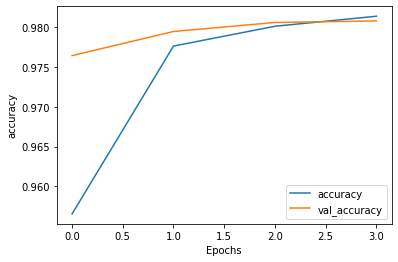

In [29]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric],'')
  plt.xlabel('Epochs')
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

plot_graphs(history, 'accuracy')

In [30]:
! pip install sklearn_crfsuite

     |████████████████████████████████| 747kB 4.0MB/s 


In [31]:
! pip install seqeval

  Created wheel for seqeval: filename=seqeval-0.0.12-cp36-none-any.whl size=7424 sha256=a5b1ba93dcb1a4cda4d5631475c1741be3ca7c11c8dea6ff4f9e63e115c28d1c
  Stored in directory: /root/.cache/pip/wheels/4f/32/0a/df3b340a82583566975377d65e724895b3fad101a3fb729f68
Successfully built seqeval


In [33]:
from  sklearn_crfsuite.metrics import flat_classification_report  

idx2tag = {i: w for w, i in tag2index.items()}

def pred2label(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            p_i = np.argmax(p)
            out_i.append(idx2tag[p_i])
        out.append(out_i)
    return out
test_pred = model.predict(X_test, verbose=1)   
pred_labels = pred2label(test_pred)
test_labels = pred2label(y_test)


150/150 [==============================] - 16s 110ms/step


Sử dụng precision_score, recall_score, f1_score để đánh giá model

In [34]:
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report
print("F1-score: {:.1%}".format(f1_score(test_labels, pred_labels)))

F1-score: 52.1%


In [35]:
from  sklearn_crfsuite.metrics import flat_classification_report  
report = flat_classification_report(y_pred=pred_labels, y_true=test_labels)
print(report)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       B-art       0.00      0.00      0.00        49
       B-eve       0.00      0.00      0.00        28
       B-geo       0.79      0.92      0.85      3761
       B-gpe       0.00      0.00      0.00      1582
       B-nat       0.00      0.00      0.00        21
       B-org       0.00      0.00      0.00      2047
       B-per       0.61      0.87      0.72      1675
       B-tim       0.00      0.00      0.00      2022
       I-art       0.00      0.00      0.00        43
       I-eve       0.00      0.00      0.00        19
       I-geo       0.74      0.78      0.76       747
       I-gpe       0.00      0.00      0.00        18
       I-nat       0.00      0.00      0.00         6
       I-org       0.61      0.79      0.69      1662
       I-per       0.00      0.00      0.00      1682
       I-tim       0.00      0.00      0.00       674
           O       0.98      1.00      0.99     88883
         PAD       0.99    